<a href="https://colab.research.google.com/github/GreeshmaHarids/Greeshma_Meta_Scifor_Technology/blob/main/Machine_Learning/Linear_Regression_revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
#LINEAR REGRESSION FROM SCRATCH

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [56]:
# Importing the data
data_df = pd.read_csv('/content/Linear Regression - Sheet1.csv')
data_df.head()

,X,Y
0,1,3.888889
1,2,4.555556
2,3,5.222222
3,4,5.888889
4,5,6.555556


In [58]:
#extracting feature and traget variablex=df['AP']
x=data_df['X'].values
y=data_df['Y'].values

In [59]:
x

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [60]:
#splitting data into trainging and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [61]:
# Adding a column of ones for the intercept term


x_train = np.vstack((np.ones_like(x_train), x_train)).T
x_test = np.vstack((np.ones_like(x_test), x_test)).T

In [62]:
#performing linear regression

def linear_regression(X, y, learning_rate, epochs):
    if X.ndim==1:
      X=X.reshape(-1,1)
    m, n = X.shape
    weights = np.zeros(n)  # Initialize weights with zeros
    cost_list = []
#gradient descent
    for _ in range(epochs):
        predictions = np.dot(X, weights)
        error = predictions - y
        gradient = np.dot(X.T, error) / m
        weights -= learning_rate * gradient

        # Calculate the cost
        cost = (1/(2*m)) * np.sum(error**2)
        cost_list.append(cost)

    return weights, cost_list

In [63]:
learning_rate = 0.000001
epochs = 1000
weights, cost_list = linear_regression(x_train, y_train, learning_rate, epochs)

# Predicting on the test set
y_pred_test = np.dot(x_test, weights)



#regerssion metrics


mse = np.mean((y_test - y_pred_test)**2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - y_pred_test))
total_variance = np.sum((y_test - np.mean(y_test))**2)
r_squared = 1 - (mse / total_variance)

if total_variance == 0:
    r_squared = 0  # If no variance, set R-squared to 0
else:
    r_squared = 1 - (mse / total_variance)

In [64]:
# Print regression metrics


print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r_squared}")

Mean Squared Error (MSE): 12.78024308677618
Root Mean Squared Error (RMSE): 3.574946585164061
Mean Absolute Error (MAE): 3.5685079774358806
R-squared: 0.9999574421440802


In [65]:
#result data frame
results_df = pd.DataFrame({
    'Actual Values': y_test,
    'Predicted Values': y_pred_test,
    'Difference (Actual - Predicted)': y_test - y_pred_test
})

# Print the DataFrame
print(results_df)

    Actual Values  Predicted Values  Difference (Actual - Predicted)
0      139.222222        135.500035                         3.722187
1      181.222222        177.344101                         3.878121
2      105.222222        101.626268                         3.595955
3        9.888889          6.646880                         3.242009
4      159.222222        155.425781                         3.796441
..            ...               ...                              ...
85      79.888889         76.386990                         3.501899
86      82.555556         79.043756                         3.511800
87      51.888889         48.490946                         3.397943
88      13.888889         10.632029                         3.256860
89      10.555556          7.311071                         3.244484

[90 rows x 3 columns]


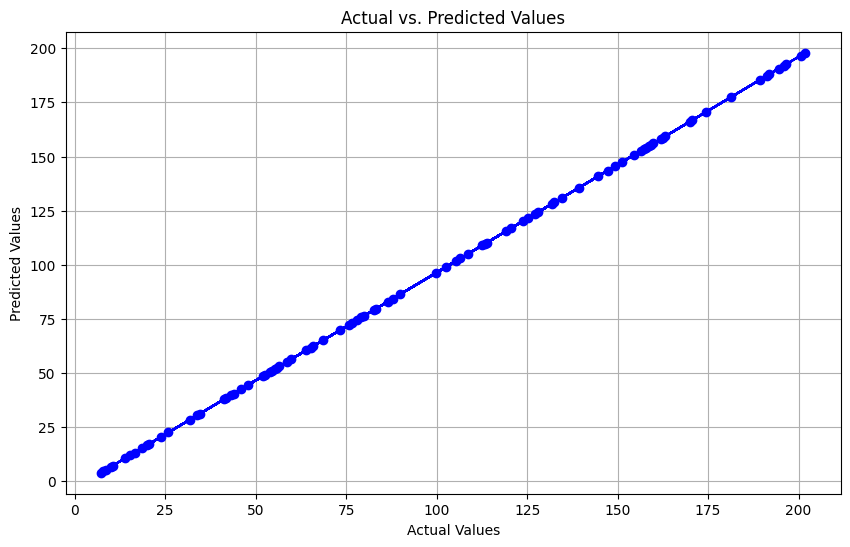

In [67]:
#regerssion line
df=results_df
# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(df['Actual Values'], df['Predicted Values'], marker='o', linestyle='-', color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)

# Display the plot
plt.show()